### Algorithms on Petrol consumption dataset

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#### Loading the dataset

In [66]:
df = pd.read_csv("01-Petrol_consumption.csv")
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [67]:
df.shape

(48, 5)

#### EDA

In [68]:
df.isnull().sum() #no null values

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [69]:
df.dtypes

Petrol_tax                      float64
Average_income                    int64
Paved_Highways                    int64
Population_Driver_licence(%)    float64
Petrol_Consumption                int64
dtype: object

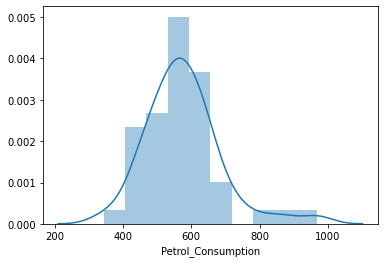

In [70]:
sns.distplot(df['Petrol_Consumption'])

In [71]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


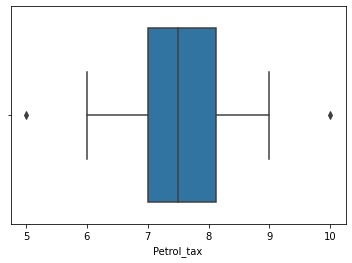

In [72]:
sns.boxplot(df['Petrol_tax'])

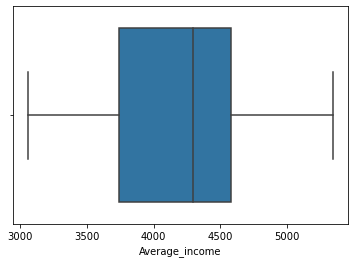

In [73]:
sns.boxplot(df['Average_income'])

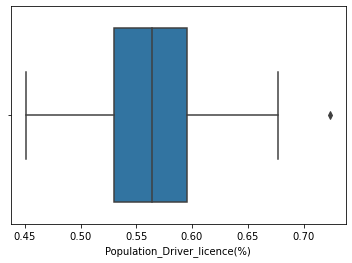

In [74]:
sns.boxplot(df['Population_Driver_licence(%)'])

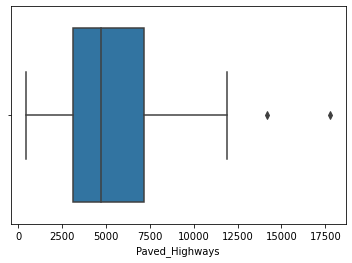

In [75]:
sns.boxplot(df['Paved_Highways'])

In [76]:
# any absolute value of z-score above 3 is considered as an Outlier
from scipy import stats
z = np.abs(stats.zscore(df))
print(np.where(z > 3))

(array([36, 39], dtype=int64), array([2, 4], dtype=int64))


In [77]:
df = df[(z < 3).all(axis=1)]
df.shape

(46, 5)

In [78]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

#### Normalization

In [79]:
from sklearn import preprocessing
X =preprocessing.StandardScaler().fit_transform(X)

#### Test Train Split

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

### Linear Regression

In [81]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() #training the model
reg = lr.fit(X_train, y_train)

In [82]:
y_pred = reg.predict(X_test)

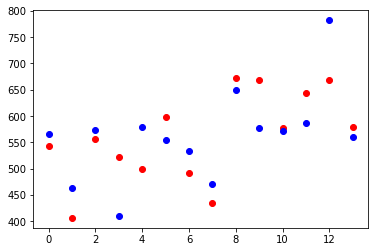

In [83]:
X=np.arange(len(y_pred))
plt.scatter(X,y_pred,color='r')
plt.scatter(X,y_test,color='b')
plt.show()

#### Mean Sqaure error

In [84]:
from sklearn.metrics import mean_squared_error, r2_score
print('Mean squared error: %.2f'
      % mean_squared_error(y_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
R2= r2_score(y_pred, y_test)

Mean squared error: 3842.11
Coefficient of determination: 0.46


In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
scores   

array([0.32468539, 0.45779074, 0.41784689, 0.71886847, 0.66275267])

In [86]:
output =pd.DataFrame(data=[y_test,y_pred],index=['y_test','y_pred'])
output.transpose()

,y_test,y_pred
0,566.0,542.933536
1,464.0,406.587647
2,574.0,555.870322
3,410.0,522.667416
4,580.0,498.705754
5,554.0,597.786091
6,534.0,491.340669
7,471.0,434.547130
8,649.0,671.455997
9,577.0,668.490040
